# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import mythinkstats as mts
import numpy as np
import pandas as pd
import random
import statsmodels.formula.api as smf

print('Ready')

Ready


## Multiple regression

Let's load up the NSFG data again.

In [10]:
preg = mts.nsfg_read_data('ThinkStats2/code/2002FemPreg.dct', 'ThinkStats2/code/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
first = live[live.birthord == 1]
other = live[live.birthord > 1]
len(live), len(first), len(other)

(9038, 4363, 4675)

Here's birth weight as a function of mother's age (which we saw in the previous chapter).

In [3]:
formula = 'totalwgt_lb ~ agepreg'
model = smf.ols(formula, data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           5.72e-11
Time:                        17:38:23   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8304      0.068    100.470      0.000       6.697       6.964
agepreg        0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can extract the parameters.

In [6]:
b = results.params['Intercept']
m = results.params['agepreg']
m, b

(0.017453851471802638, 6.830396973311051)

And the p-value of the slope estimate.

In [7]:
results.pvalues['agepreg']

5.7229471073163425e-11

And the coefficient of determination.

In [8]:
results.rsquared

0.004738115474710369

## Investigate if statistical significance of first babies being heavier than other babies is a spurious result

The difference in birth weight between first babies and others.

In [13]:
# First babies are 0.125 lbs lighter than "other" babies.
diff_weight = first.totalwgt_lb.mean() - other.totalwgt_lb.mean()
round(diff_weight, 3)

-0.125

The difference in age between mothers of first babies and others.

In [16]:
# First babies' mothers are, on average, 3.559 years younger than other babies' mothers.
diff_age = first.agepreg.mean() - other.agepreg.mean()
round(diff_age, 3)

-3.559

The age difference plausibly explains about half of the difference in weight.

In [17]:
m * diff_age

-0.06211339678698065

Running a single regression with a categorical variable, `isfirst`:

In [18]:
live['isfirst'] = live.birthord == 1
formula = 'totalwgt_lb ~ isfirst'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.74
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           2.55e-05
Time:                        17:46:55   Log-Likelihood:                -15909.
No. Observations:                9038   AIC:                         3.182e+04
Df Residuals:                    9036   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3259      0.021    356.007      0.000       7.286       7.366
isfirst[T.True]    -0.1248      0.030     -4.212      0.000      -0.183      -0.067
==============================================================================
Omnibus:                      988.919   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.107
Skew:                          -0.589   Prob(JB):                         0.00
Kurtosis:                       5.511   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

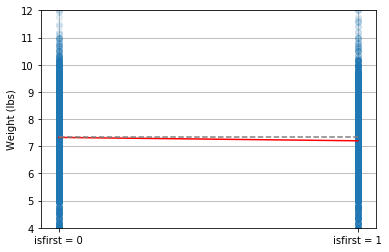

In [43]:
# Show the linear function inferred using "isfirst" as the independent feature.
# The model effectively predicts all first children with a weight 0.125 lower
# than the other children. This can barely be seen in the graph below.
f = lambda X: results.params['isfirst[T.True]'] * X + results.params['Intercept']
plt.scatter(live.isfirst, live.totalwgt_lb, alpha=0.1)
plt.xticks([0, 1], ['isfirst = 0', 'isfirst = 1'])
X = np.arange(0, 2)
plt.plot(X, f(X), color='red')
plt.plot(X, [f(X[0]), f(X[0])], color='gray', linestyle='--')
plt.ylabel('Weight (lbs)')
plt.ylim(4, 12)
plt.grid()
plt.show()

Now finally running a multiple regression:

In [44]:
# totalwgt_lb depends on both isfirst and agepreg.
formula = 'totalwgt_lb ~ isfirst + agepreg'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     24.02
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           3.95e-11
Time:                        18:20:28   Log-Likelihood:                -15894.
No. Observations:                9038   AIC:                         3.179e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9142      0.078     89.073      0.000       6.762       7.066
isfirst[T.True]    -0.0698      0.031     -2.236      0.025      -0.131      -0.009
agepreg             0.0154      0.003      5.499      0.000       0.010       0.021
==============================================================================
Omnibus:                     1019.945   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3063.682
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.588   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, when we control for mother's age, the apparent difference due to `isfirst` is cut in half.

If we add age squared, we can control for a quadratic relationship between age and weight.

In [45]:
live['agepreg2'] = live.agepreg**2
formula = 'totalwgt_lb ~ isfirst + agepreg + agepreg2'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.64
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           1.35e-14
Time:                        18:24:08   Log-Likelihood:                -15884.
No. Observations:                9038   AIC:                         3.178e+04
Df Residuals:                    9034   BIC:                         3.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6923      0.286     19.937      0.000       5.133       6.252
isfirst[T.True]    -0.0504      0.031     -1.602      0.109      -0.112       0.011
agepreg             0.1124      0.022      5.113      0.000       0.069       0.155
agepreg2           -0.0018      0.000     -4.447      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1007.149   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3003.343
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                       5.562   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we do that, the apparent effect of `isfirst` gets even smaller, and is no longer statistically significant.

These results suggest that the apparent difference in weight between first babies and others might be explained by difference in mothers' ages, at least in part.

## Data Mining

We can use `join` to combine variables from the preganancy and respondent tables.

In [48]:
resp = mts.nsfg_read_data('ThinkStats2/code/2002FemResp.dct', 'ThinkStats2/code/2002FemResp.dat.gz')
live = live[live.prglngth>30]
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')
join.head(2)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,pubassis_i_r,basewgt_r,adj_mod_basewgt_r,finalwgt_r,secu_r,sest_r,cmintvw_r,cmlstyr,screentime,intvlngth
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833


And we can search for variables with explanatory power.

Because we don't clean most of the variables, we are probably missing some good ones.

In [61]:
import patsy

def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = 'totalwgt_lb ~ agepreg + ' + name

            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError):
            continue

        variables.append((results.rsquared, name))

    return variables

In [63]:
variables = GoMining(join)
len(variables)

889

(1.0, 'totalwgt_lb')

The following functions report the variables with the highest values of $R^2$.

Some of the variables that do well are not useful for prediction because they are not known ahead of time.

In [75]:
for r2, name in sorted(variables, reverse=True)[:10]:
    print('%s %.3lf' % (name, r2))
    

totalwgt_lb 1.000
birthwgt_lb 0.950
lbw1 0.301
prglngth 0.130
wksgest 0.123
agecon 0.102
mosgest 0.027
babysex 0.019
race_r 0.016
race 0.016


Combining the variables that seem to have the most explanatory power.

In [76]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + '
               'nbrnaliv>1 + paydu==1 + totincr')
results = smf.ols(formula, data=join).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     79.98
Date:                Sun, 18 Feb 2018   Prob (F-statistic):          4.86e-113
Time:                        19:08:33   Log-Likelihood:                -14295.
No. Observations:                8781   AIC:                         2.861e+04
Df Residuals:                    8773   BIC:                         2.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.6303      0.065    102.223      0.000       6.503       6.757
C(race)[T.2]             0.3570      0.032     11.215      0.000       0.295       0.419
C(race)[T.3]             0.2665      0.051      5.175      0.000       0.166       0.367
babysex == 1[T.True]     0.2952      0.026     11.216      0.000       0.244       0.347
nbrnaliv > 1[T.True]    -1.3783      0.108    -12.771      0.000      -1.590      -1.167
paydu == 1[T.True]       0.1196      0.031      3.861      0.000       0.059       0.180
agepreg                  0.0074      0.003      2.921      0.004       0.002       0.012
totincr                  0.0122      0.004      3.110      0.002       0.005       0.020
==============================================================================
Omnibus:                      398.813   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.362
Skew:                          -0.037   Prob(JB):                    3.32e-302
Kurtosis:                       4.947   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic regression

Example: suppose we are trying to predict `y` using explanatory variables `x1` and `x2`.

In [77]:
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

According to the logit model the log odds for the $i$th element of $y$ is

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

So let's start with an arbitrary guess about the elements of $\beta$:



In [78]:
beta = [-1.5, 2.8, 1.1]

Plugging in the model, we get log odds.

In [79]:
log_o = beta[0] + beta[1] * x1 + beta[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Which we can convert to odds.

In [80]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

And then convert to probabilities.

In [81]:
p = o / (o+1)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

The likelihoods of the actual outcomes are $p$ where $y$ is 1 and $1-p$ where $y$ is 0. 

In [83]:
likes = np.where(y, p, 1-p)
likes

array([0.81757448, 0.40131234, 0.59868766, 0.9168273 ])

The likelihood of $y$ given $\beta$ is the product of `likes`:

In [84]:
like = np.prod(likes)
like

0.1800933529673034

Logistic regression works by searching for the values in $\beta$ that maximize `like`.

Here's an example using variables in the NSFG respondent file to predict whether a baby will be a boy or a girl.

In [107]:
live = live[live.prglngth > 30]
live['boy'] = (live.babysex==1).astype(int)
live['boy'].values

array([1, 0, 1, ..., 1, 1, 1])

The mother's age seems to have a small effect.

In [108]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
model = smf.logit('boy ~ agepreg', data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.693022
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8781
Model:                          Logit   Df Residuals:                     8779
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:               5.361e-06
Time:                        19:58:52   Log-Likelihood:                -6085.4
converged:                       True   LL-Null:                       -6085.5
                                        LLR p-value:                    0.7984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0067      0.098      0.068      0.946      -0.186       0.199
agepreg        0.0010      0.004      0.255      0.798      -0.007       0.009
==============================================================================
"""

Here are the variables that seemed most promising.

In [110]:
formula = 'boy ~ agepreg + hpagelb + birthord + C(race)'
model = smf.logit(formula, data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.692916
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8686
Model:                          Logit   Df Residuals:                     8680
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:               0.0001953
Time:                        19:59:18   Log-Likelihood:                -6018.7
converged:                       True   LL-Null:                       -6019.8
                                        LLR p-value:                    0.7988
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0333      0.105     -0.318      0.750      -0.238       0.172
C(race)[T.2]    -0.0257      0.051     -0.501      0.616      -0.126       0.075
C(race)[T.3]    -0.0069      0.084     -0.082      0.935      -0.172       0.158
agepreg         -0.0035      0.006     -0.630      0.529      -0.014       0.007
hpagelb          0.0052      0.004      1.225      0.221      -0.003       0.014
birthord         0.0113      0.022      0.510      0.610      -0.032       0.055
================================================================================
"""

To make a prediction, we have to extract the exogenous and endogenous variables.

In [94]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

The baseline prediction strategy is to guess "boy".  In that case, we're right almost 51% of the time.

In [95]:
actual = endog['boy']
baseline = actual.mean()
baseline

0.5069076675109372

If we use the previous model, we can compute the number of predictions we get right.

In [96]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(3625.0, 832.0)

And the accuracy, which is slightly higher than the baseline.

In [97]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.5131245682707806

To make a prediction for an individual, we have to get their information into a `DataFrame`.

In [98]:
columns = ['agepreg', 'hpagelb', 'birthord', 'race']
new = pd.DataFrame([[35, 39, 3, 2]], columns=columns)
y = results.predict(new)
y

0    0.513876
dtype: float64

This person has a 51% chance of having a boy (according to the model).

## Exercises

**Exercise:** Suppose one of your co-workers is expecting a baby and you are participating in an office pool to predict the date of birth. Assuming that bets are placed during the 30th week of pregnancy, what variables could you use to make the best prediction? You should limit yourself to variables that are known before the birth, and likely to be available to the people in the pool.

In [99]:
live = live[live.prglngth>30]
len(live)

8781

The following are the only variables I found that have a statistically significant effect on pregnancy length.

In [100]:
model = smf.ols('prglngth ~ birthord==1 + race==2 + nbrnaliv>1', data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prglngth   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.78
Date:                Mon, 19 Feb 2018   Prob (F-statistic):           2.45e-22
Time:                        19:46:58   Log-Likelihood:                -18056.
No. Observations:                8781   AIC:                         3.612e+04
Df Residuals:                    8777   BIC:                         3.615e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                38.7617      0.039    994.672      0.000      38.685      38.838
birthord == 1[T.True]     0.1089      0.040      2.691      0.007       0.030       0.188
race == 2[T.True]         0.1394      0.042      3.289      0.001       0.056       0.223
nbrnaliv > 1[T.True]     -1.5099      0.165     -9.124      0.000      -1.834      -1.186
==============================================================================
Omnibus:                     1569.541   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6087.084
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       6.706   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** The Trivers-Willard hypothesis suggests that for many mammals the sex ratio depends on “maternal condition”; that is, factors like the mother’s age, size, health, and social status. See https://en.wikipedia.org/wiki/Trivers-Willard_hypothesis

Some studies have shown this effect among humans, but results are mixed. In this chapter we tested some variables related to these factors, but didn’t find any with a statistically significant effect on sex ratio.

As an exercise, use a data mining approach to test the other variables in the pregnancy and respondent files. Can you find any factors with a substantial effect?

In [111]:
# Join the response and preg data frames.
preg = mts.nsfg_read_data('ThinkStats2/code/2002FemPreg.dct', 'ThinkStats2/code/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]
live = live[live.prglngth>30]
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

resp = mts.nsfg_read_data('ThinkStats2/code/2002FemResp.dct', 'ThinkStats2/code/2002FemResp.dat.gz')
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')
join.head(2)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,pubassis_i_r,basewgt_r,adj_mod_basewgt_r,finalwgt_r,secu_r,sest_r,cmintvw_r,cmlstyr,screentime,intvlngth
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833


In [125]:
# Test many variables as predictor for sex of the child born.
# Ran into bugs on this part.

In [128]:
join['boy'] = (join.babysex==1).astype(int)
formula='boy ~ agepreg + fmarout5==5 + infever==1'
model = smf.logit(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.691703
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8781
Model:                          Logit   Df Residuals:                     8777
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:                0.001908
Time:                        20:18:16   Log-Likelihood:                -6073.8
converged:                       True   LL-Null:                       -6085.5
                                        LLR p-value:                 3.633e-05
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1936      0.119     -1.630      0.103      -0.426       0.039
fmarout5 == 5[T.True]     0.1695      0.050      3.421      0.001       0.072       0.267
infever == 1[T.True]      0.2369      0.065      3.623      0.000       0.109       0.365
agepreg                   0.0053      0.004      1.215      0.224      -0.003       0.014
=========================================================================================
"""

**Exercise:** If the quantity you want to predict is a count, you can use Poisson regression, which is implemented in StatsModels with a function called `poisson`. It works the same way as `ols` and `logit`. As an exercise, let’s use it to predict how many children a woman has born; in the NSFG dataset, this variable is called `numbabes`.

Suppose you meet a woman who is 35 years old, black, and a college graduate whose annual household income exceeds $75,000. How many children would you predict she has born?

In [132]:
# Solution goes here
# Replace outlier ages and add an age^2 feature.
join.numbabes.replace([97], np.nan, inplace=True)
join['age2'] = join.age_r**2

# Poisson regression with statsmodels.
formula='numbabes ~ age_r + age2 + C(race) + totincr + educat'
model = smf.poisson(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.674288
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numbabes   No. Observations:                 8781
Model:                        Poisson   Df Residuals:                     8774
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:                 0.03624
Time:                        20:23:04   Log-Likelihood:                -14702.
converged:                       True   LL-Null:                       -15255.
                                        LLR p-value:                1.169e-235
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0374      0.170     -6.089      0.000      -1.371      -0.703
C(race)[T.2]    -0.1385      0.015     -9.294      0.000      -0.168      -0.109
C(race)[T.3]    -0.1000      0.025     -4.002      0.000      -0.149      -0.051
age_r            0.1557      0.010     14.923      0.000       0.135       0.176
age2            -0.0020      0.000    -13.044      0.000      -0.002      -0.002
totincr         -0.0185      0.002     -9.638      0.000      -0.022      -0.015
educat          -0.0468      0.003    -15.792      0.000      -0.053      -0.041
================================================================================
"""

Now we can predict the number of children for a woman who is 35 years old, black, and a college
graduate whose annual household income exceeds $75,000

In [133]:
# Create a dataframe with the specified features and make a prediction.
new = pd.DataFrame(
    [[35, 35**2, 1, 14, 16]], 
    columns=['age_r', 'age2', 'race', 'totincr', 'educat'])
results.predict(new)

0    2.496388
dtype: float64

**Exercise:** If the quantity you want to predict is categorical, you can use multinomial logistic regression, which is implemented in StatsModels with a function called `mnlogit`. As an exercise, let’s use it to guess whether a woman is married, cohabitating, widowed, divorced, separated, or never married; in the NSFG dataset, marital status is encoded in a variable called `rmarital`.

Suppose you meet a woman who is 25 years old, white, and a high school graduate whose annual household income is about $45,000. What is the probability that she is married, cohabitating, etc?

In [139]:
formula='rmarital ~ age_r + age2 + C(race) + totincr + educat'
model = smf.mnlogit(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.079016
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               rmarital   No. Observations:                 8781
Model:                        MNLogit   Df Residuals:                     8746
Method:                           MLE   Df Model:                           30
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:                  0.1699
Time:                        20:39:37   Log-Likelihood:                -9474.8
converged:                       True   LL-Null:                       -11414.
                                        LLR p-value:                     0.000
================================================================================
  rmarital=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0728      0.811     11.191      0.000       7.484      10.662
C(race)[T.2]    -0.9328      0.089    -10.447      0.000      -1.108      -0.758
C(race)[T.3]    -0.6251      0.138     -4.538      0.000      -0.895      -0.355
age_r           -0.3616      0.051     -7.065      0.000      -0.462      -0.261
age2             0.0048      0.001      5.993      0.000       0.003       0.006
totincr         -0.1290      0.012    -11.063      0.000      -0.152      -0.106
educat          -0.2020      0.019    -10.636      0.000      -0.239      -0.165
--------------------------------------------------------------------------------
  rmarital=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2123      3.025      1.062      0.288      -2.717       9.142
C(race)[T.2]    -0.3721      0.243     -1.534      0.125      -0.848       0.103
C(race)[T.3]     0.1692      0.341      0.496      0.620      -0.500       0.838
age_r           -0.3362      0.177     -1.900      0.057      -0.683       0.011
age2             0.0067      0.003      2.638      0.008       0.002       0.012
totincr         -0.3249      0.032    -10.060      0.000      -0.388      -0.262
educat          -0.1036      0.049     -2.113      0.035      -0.200      -0.008
--------------------------------------------------------------------------------
  rmarital=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.4092      1.208     -2.822      0.005      -5.777      -1.041
C(race)[T.2]    -0.3069      0.094     -3.261      0.001      -0.491      -0.122
C(race)[T.3]    -0.8989      0.182     -4.951      0.000      -1.255      -0.543
age_r            0.1089      0.071      1.529      0.126      -0.031       0.248
age2            -0.0006      0.001     -0.616      0.538      -0.003       0.001
totincr         -0.2289      0.012    -19.522      0.000      -0.252      -0.206
educat           0.0677      0.017      3.998      0.000       0.035       0.101
--------------------------------------------------------------------------------
  rmarital=5       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.8398      1.320     -2.152      0.031      -5.427      -0.253
C(race)[T.2]    -1.0473      0.105     -9.981      0.000      -1.253      -0.842
C(race)[T.3]    -0.5774      0.159     -3.641      0.000      -0.888      -0.267
age_r            0.2374      0.080      2.957      0.003       0.080       0.395
age2            -0.0035      0.001     -2.895      0.004      -0.006      -0.001
totincr         -0.2956      0.015    -20.012      0.000      -0.325      -0.267
educat          -0.0168      0.022     -0.771      0.441      -0.060       0.026
-

Make a prediction for a woman who is 25 years old, white, and a high
school graduate whose annual household income is about $45,000.

In [141]:
# Bug in statsmodels: https://github.com/statsmodels/statsmodels/issues/3958
columns = ['age_r', 'age2', 'race', 'totincr', 'educat']
new = pd.DataFrame([[25, 25**2, 2, 11, 12]], columns=columns)
# results.predict(new)